▶ SUSCRÍBETE al canal XPIKUOS de YOUTUBE y DALE a la CAMPANITA para estar informado de las novedades:
https://www.youtube.com/c/Xpikuos?sub_confirmation=1

▶ MIRA el siguiente VÍDEO explicativo para entender mejor el código:
https://www.youtube.com/watch?v=awawNe1YaOs&t=0s&index=2&list=PLaHpNulXyoOS_DMC4lzcfYYDaHJRSCw9G

In [2]:
#EJEMPLO DE CONVERSIÓN TEXTO A VOZ (TTS) USANDO UN VOCODER PARA PERSONALIZAR LA VOZ
#https://pysoundfile.readthedocs.io/en/0.9.0/
#Trozos de código interesantes para trocear un fichero de audio y otras cosas...: https://pypi.org/project/SoundFile/
#Más información: https://media.readthedocs.org/pdf/gtts/latest/gtts.pdf

In [3]:
#Importar librerías
import soundfile as sf
import pygame
import pyworld as pw
from gtts import gTTS
from tempfile import TemporaryFile
from pygame import mixer
from pydub import AudioSegment
from os import path
import os
import matplotlib.pyplot as plt

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
tts = gTTS(text='Hola. ¿Cómo estás?', lang='es')
tts.save('C:\\IA\\hola.mp3')

In [5]:
sound = AudioSegment.from_mp3("hola.mp3")
sound.export("C:\\IA\\hola.wav", format="wav")

<_io.BufferedRandom name='C:\\IA\\hola.wav'>

In [6]:
ficheroConLaVozModificada = 'C:\\IA\\holaVoc.wav'

In [7]:
velocidadDelDiscurso=1.6 #cuanto mayor es el número, más rápido habla. 1->voz original. 
#OJO! Cuanto más rápido habla, más aguda suena la voz, así que hay que compensarlo con la gravedad
gravedad=5 #cuanto mayor es el número, más grave es la voz.1->voz original
atenuacionDelVolumen=1 #cuanto mayor es el número, más bajo se escucha la voz.1->voz original

Número de muestras de audio:76608


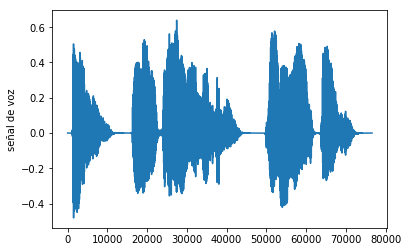

In [8]:
x, fs = sf.read('hola.wav')
print('Número de muestras de audio:{0}'.format(len(x)))
plt.plot(x)
plt.ylabel('señal de voz')
plt.show()

Número de valores calulados de f0:639 y ap:639
Número de muestras usadas para calular f0 y ap:119.88732394366197


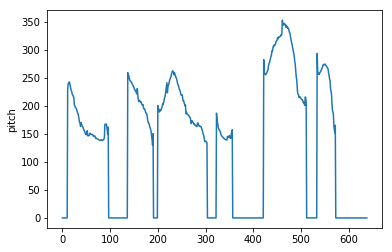

In [9]:
f0, sp, ap = pw.wav2world(x, fs)
print('Número de valores calulados de f0:{0} y ap:{1}'.format(len(f0), len(ap)))
print('Número de muestras usadas para calular f0 y ap:{0}'.format(len(x)/len(f0)))
plt.plot(f0)
plt.ylabel('pitch')
plt.show()

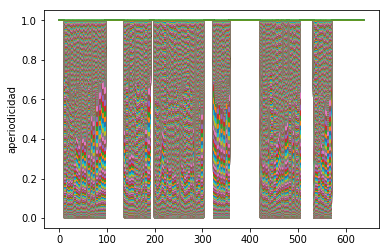

In [10]:
plt.plot(ap)
plt.ylabel('aperiodicidad')
plt.show()

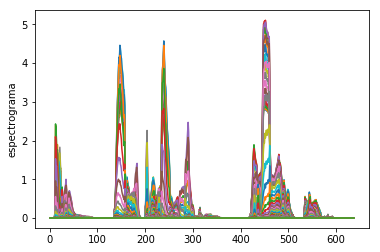

In [11]:
plt.plot(sp)
plt.ylabel('espectrograma')
plt.show()

In [12]:
yy = pw.synthesize(f0/gravedad, sp/atenuacionDelVolumen, ap, fs/velocidadDelDiscurso, pw.default_frame_period)
sf.write(ficheroConLaVozModificada, yy, fs)

In [13]:
mixer.init()
mixer.music.load(ficheroConLaVozModificada)
print("Reproduciendo " + ficheroConLaVozModificada)
mixer.music.play()
while mixer.music.get_busy(): 
    pygame.time.Clock().tick(10)
mixer.quit()

Reproduciendo C:\IA\holaVoc.wav


In [14]:
os.remove(ficheroConLaVozModificada)